## Foodborne disease using tabular data

## About :
One in every person in the United States gets sick from eating food at various location in different states. While most foodborne illnesses are not considered outbreaks. But if some of them are at a larger scale, they can be life threatening. The problem at hand is the Foodborne outbreaks in the past caused by various factors. We want to find a way to predict the major factors that contribute towards foodborne diseases.

## Features :
1.Supervised Learning System — It takes into consideration the key features like State, Month, Year, Food Consumed, Location of Food Consumption to predict the possible number of illnesses. This is surely helpful for Centre for Disease Control and Prevention to taking neccessary measures ahead of time to mitigate the risks.

2.Type of Predictions Made

Prediction of Illnesses Count based on the features mentioned above Classification of Diseases as High Scaled or Low Scaled Time Series Analysis to understand the impact of Month and Year on the Oubtreak Impact

3.Algorithms Used — There are multiple algorithms involved in this system to tackle the outbreaks.

Regression Models - Linear Regression, Linear Regression with Regularization and Cross Validation, Decision Tree Regression, Random Forest Regression Classfication Model- Logistic Regression Time Series Analysis - Base Time Series Model, Rolling Average Model

4.Data Cleansing and Normalization — Data is messy and hence we have perfomed data cleaning using pandas to ensure that data loss is minimal and the values which we are predicted are uniformly distributed to ensure best outcomes. Example of operations - Removing null values, replacing null values with mean values, removing non impactful features, taking Logarithm of prediction values to bring it on a normalized scale.

5.Data Visualization to represent findings — At many instances, the data has been represented using Matplotlib, Seaborn and Pandas library to assist stakeholders in understanding the findings in the easist and user friendly way.

6.String Indexing, One Hot Encoding - String Indexing and One hot encoding is performed

7.Evaluation criteria Regression models - RMSE Classification models - AUC ROC

Performing Machine Learning on a Food-based illness dataset available from CDC and FDA to predict illness counts based on State, Month, Location and type of Food Consumed

## The dataset used for the propect is the Foodborne Disease Outbreaks, 1998-2015.
Link to the dataset - https://www.kaggle.com/cdc/foodborne-diseases

# Importing required libraries

In [79]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import joblib

# Import the dataset

In [80]:
outbreaks = pd.read_csv("outbreaks.csv")
outbreaks.head(10)

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0
5,1998,January,California,Restaurant,NaN,NaN,Shigella boydii,NaN,Confirmed,25,3.0,0.0
6,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,8,0.0,0.0
7,1998,January,California,Restaurant,"Stuffing, Unspecified; Sandwich, Turkey",NaN,Salmonella enterica,Enteritidis,Confirmed,4,3.0,0.0
8,1998,January,Colorado,Restaurant,"Salad, Unspecified",NaN,Virus,NaN,Suspected,21,NaN,NaN
9,1998,January,Colorado,Restaurant,"Peppers, Chili",NaN,Virus,NaN,Suspected,3,NaN,0.0


In [81]:
outbreaks.isnull().sum()

Year                     0
Month                    0
State                    0
Location              2166
Food                  8963
Ingredient           17243
Species               6619
Serotype/Genotype    15212
Status                6619
Illnesses                0
Hospitalizations      3625
Fatalities            3601
dtype: int64

## Preprocessing and visualization

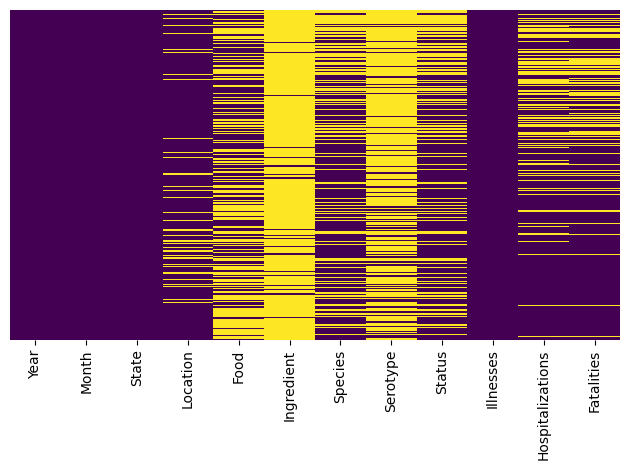

In [84]:
plt.cla()
sns.heatmap(outbreaks.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.tight_layout()
display()

In [85]:
outbreaks =outbreaks.rename(index=str, columns={"Serotype/Genotype": "Serotype"})

## Plotting the distribution of the values under the column "Species"

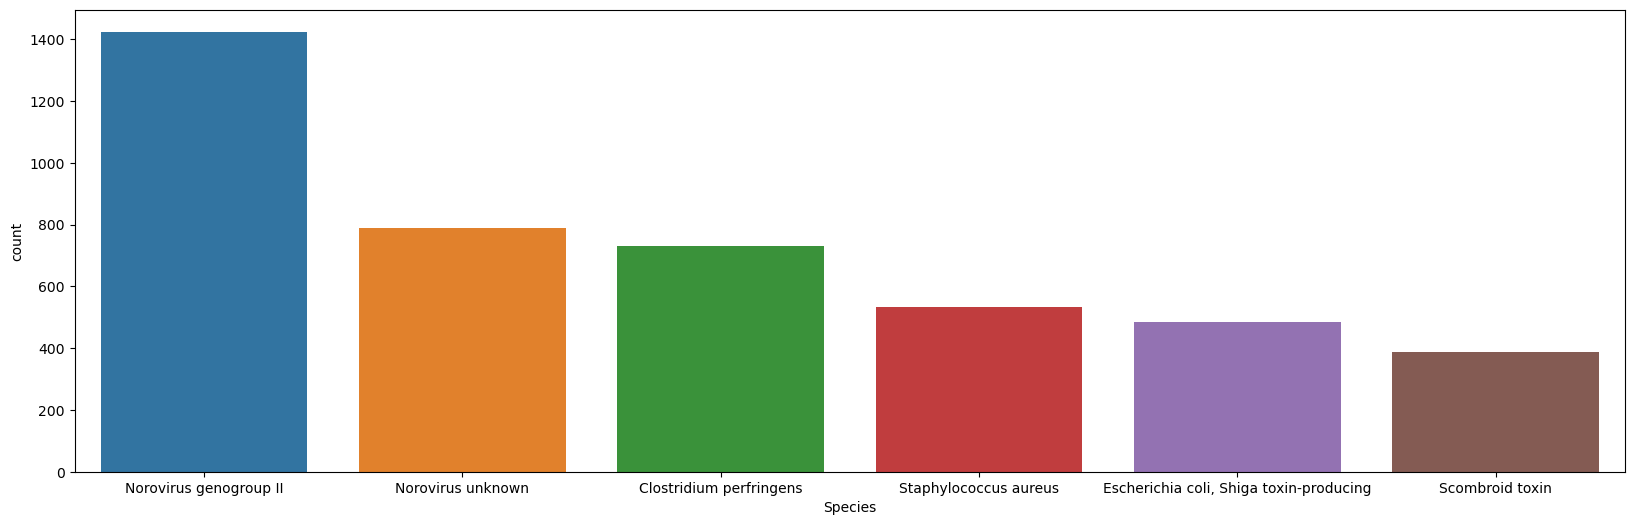

In [86]:
plt.subplots(figsize=(20,6))
sns.countplot(x='Species', data=outbreaks, order= outbreaks.Species.value_counts().iloc[2:8].index)
display()

## Plotting the distribution of the illnesses throughout all the states in the U.S.A

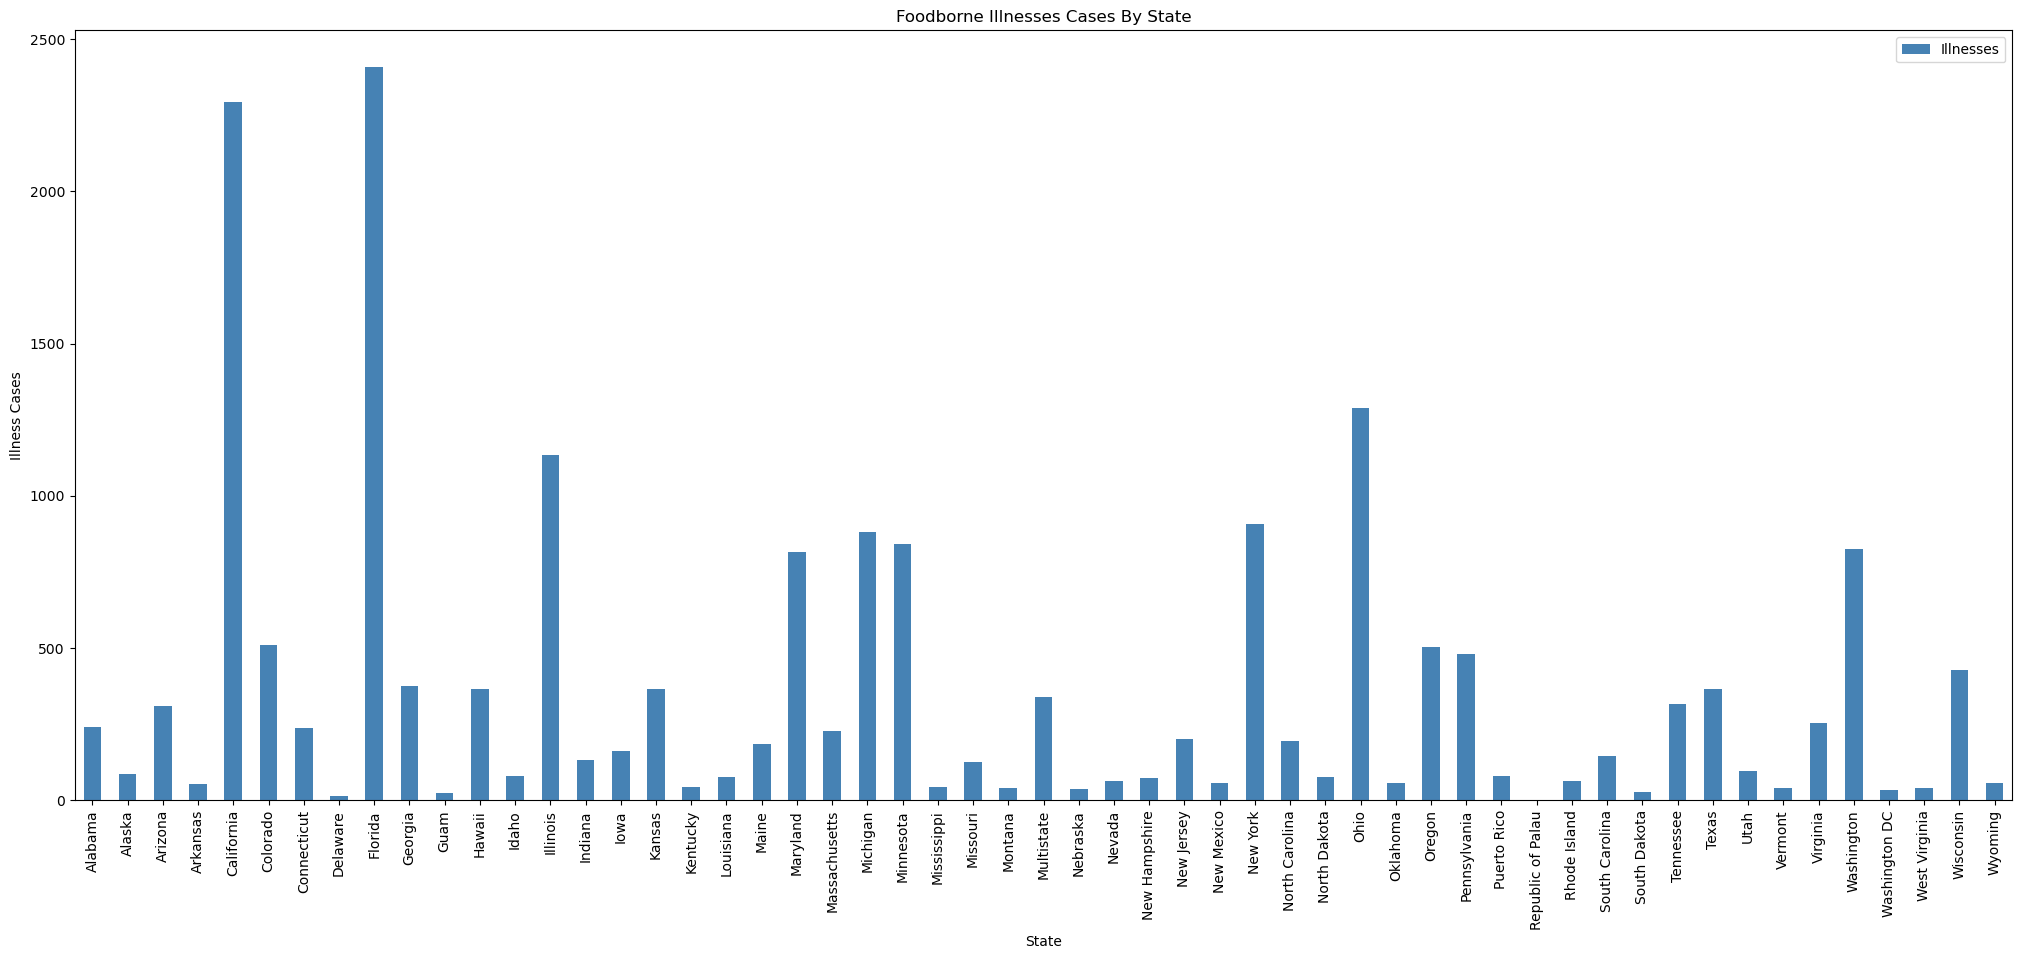

In [87]:
# Assuming 'outbreaks' is your DataFrame containing data
# Create a pivot table to aggregate the number of illnesses by state
df2 = pd.pivot_table(outbreaks, index='State', values='Illnesses', aggfunc='count')
# Plot the bar chart
ax = df2.plot(kind='bar', color='steelblue', figsize=(25, 10))
plt.title('Foodborne Illnesses Cases By State')
plt.ylabel('Illness Cases')
plt.show()

## Showing the distribution of food types in the data. As we see below, these are some of the most popular food types consumed.¶

In [88]:
outbreaks.Food.value_counts()

Food
Multiple Foods                                        206
Oysters, Raw                                          165
Ground Beef, Hamburger                                127
Salad, Unspecified                                    118
Chicken, Unspecified                                  105
                                                     ... 
Goat, Other                                             1
Chicken, Nuggets/Fingers; Coleslaw; Potato, Mashed      1
Sandwich, Club; Potato Salad                            1
Milk, 2% Milk Pasteurized                               1
Cookies, Chocolate Chip                                 1
Name: count, Length: 3127, dtype: int64

## Dropping columns from the dataset that we will not use for analysis. The columns are "Ingredient","Serotype","Species","Status","Fatalities"

In [89]:
outbreaks.drop(['Ingredient', 'Serotype', 'Species', 'Status', 'Fatalities'], axis=1, inplace=True)
outbreaks.head()

,Year,Month,State,Location,Food,Illnesses,Hospitalizations
0,1998,January,California,Restaurant,NaN,20,0.0
1,1998,January,California,NaN,Custard,112,0.0
2,1998,January,California,Restaurant,NaN,35,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",4,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",26,3.0


## Plotting the new reduced dataset to see the frequency of null values

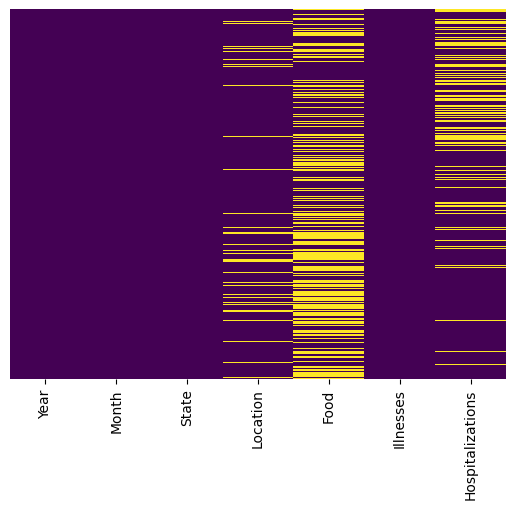

In [90]:
plt.cla()
sns.heatmap(outbreaks.isnull(), yticklabels=False, cbar=False, cmap='viridis')
display()

## Checking Null values in location

In [91]:
outbreaks.isnull().sum()

Year                   0
Month                  0
State                  0
Location            2166
Food                8963
Illnesses              0
Hospitalizations    3625
dtype: int64

## Checking count of values in dataset

In [92]:
outbreaks.count()

Year                19119
Month               19119
State               19119
Location            16953
Food                10156
Illnesses           19119
Hospitalizations    15494
dtype: int64

## Plotting how illnesses are distributed over the dataset

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


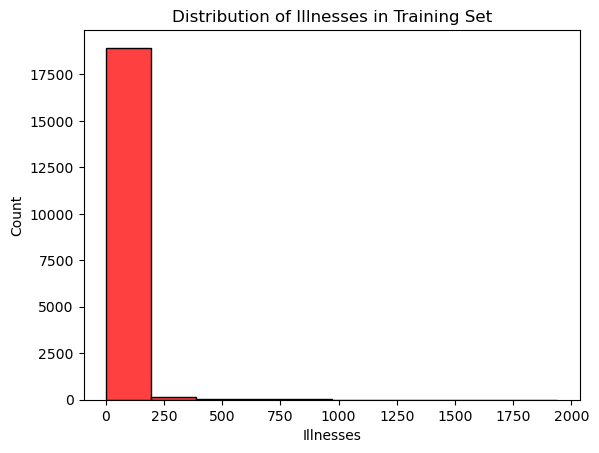

In [93]:
# Plot the distribution of illnesses using histplot
sns.histplot(outbreaks.Illnesses, bins=10, color='red')
plt.title('Distribution of Illnesses in Training Set')
plt.show()

## Plotting the Distribution of FoodBorne Illnesses by State. We found that California and illinois are the states with the most illnesses.

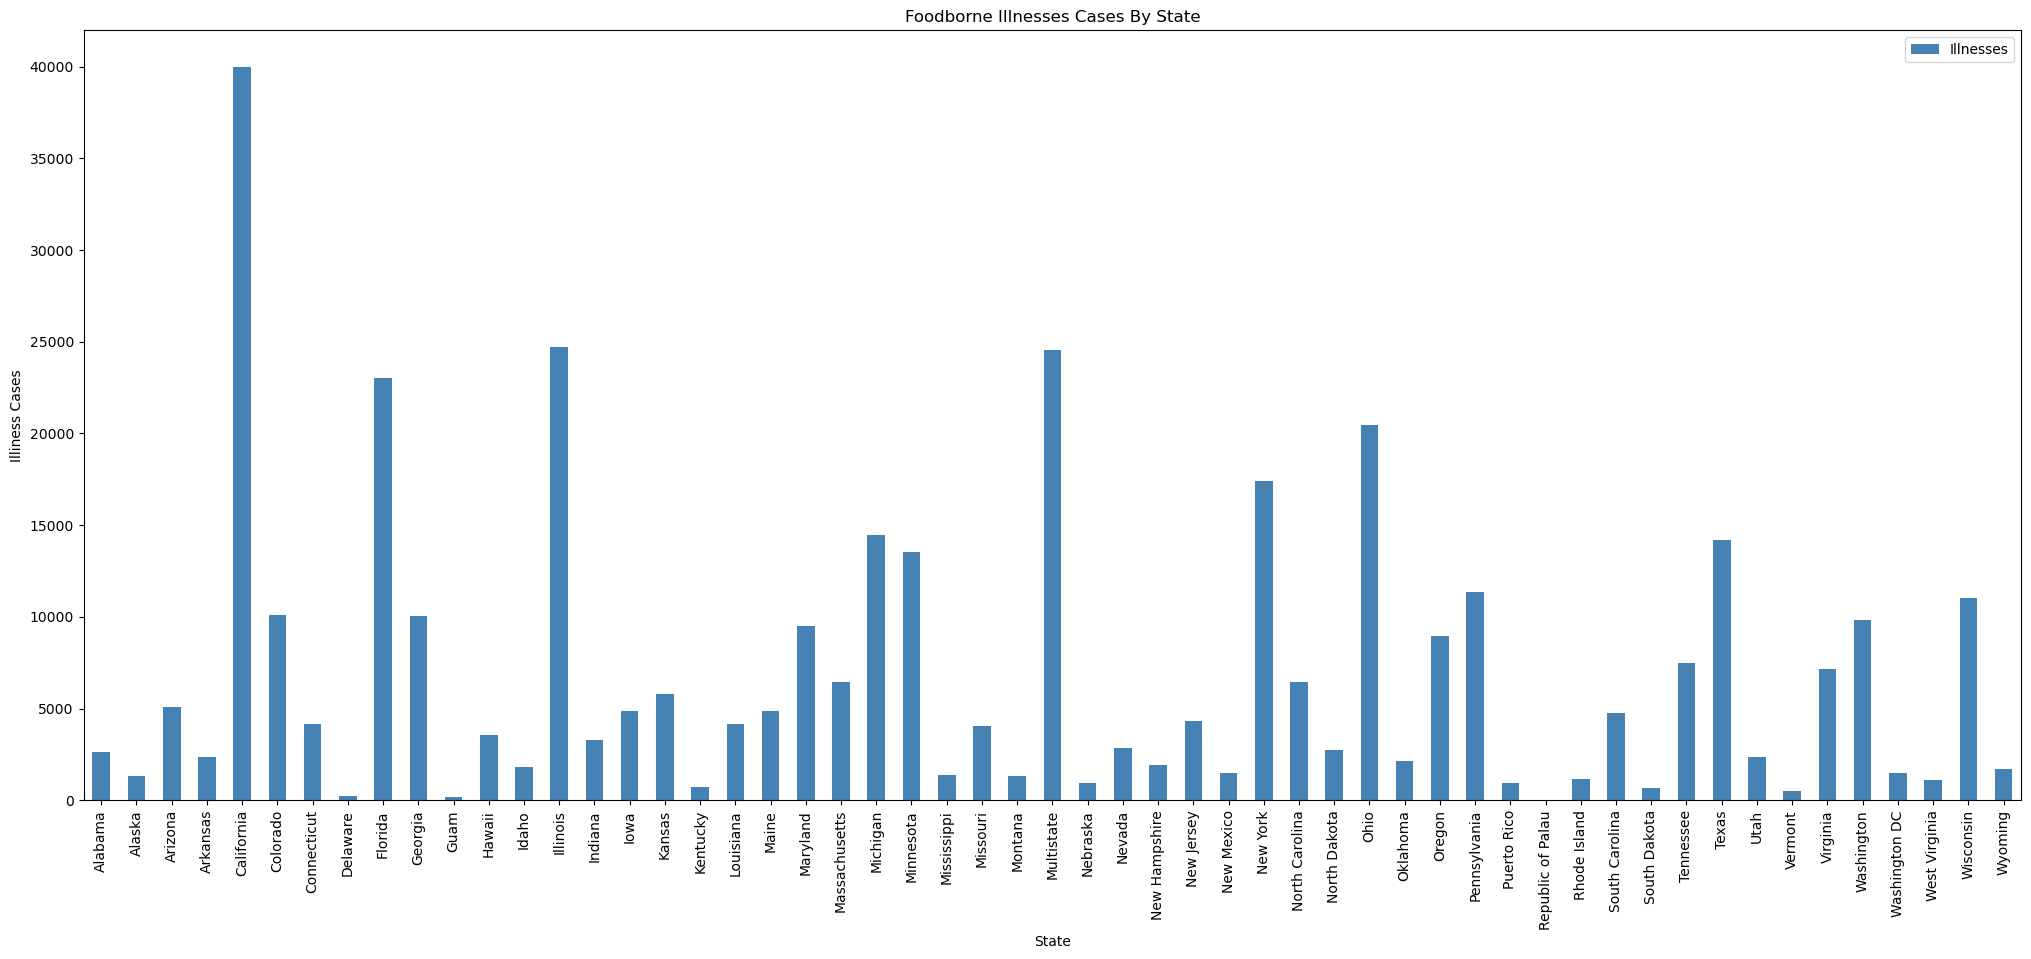

In [94]:
plt.show()
df2 = pd.pivot_table(outbreaks, index='State', values='Illnesses', aggfunc='sum')
ax = df2.plot(kind='bar', color='steelblue',figsize=(25,10))
plt.title('Foodborne Illnesses Cases By State')
plt.ylabel('Illiness Cases')
display()

## Plotting the Distribution of FoodBorne Illnesses by Year. We found that there is declining trend with some crests and troughs

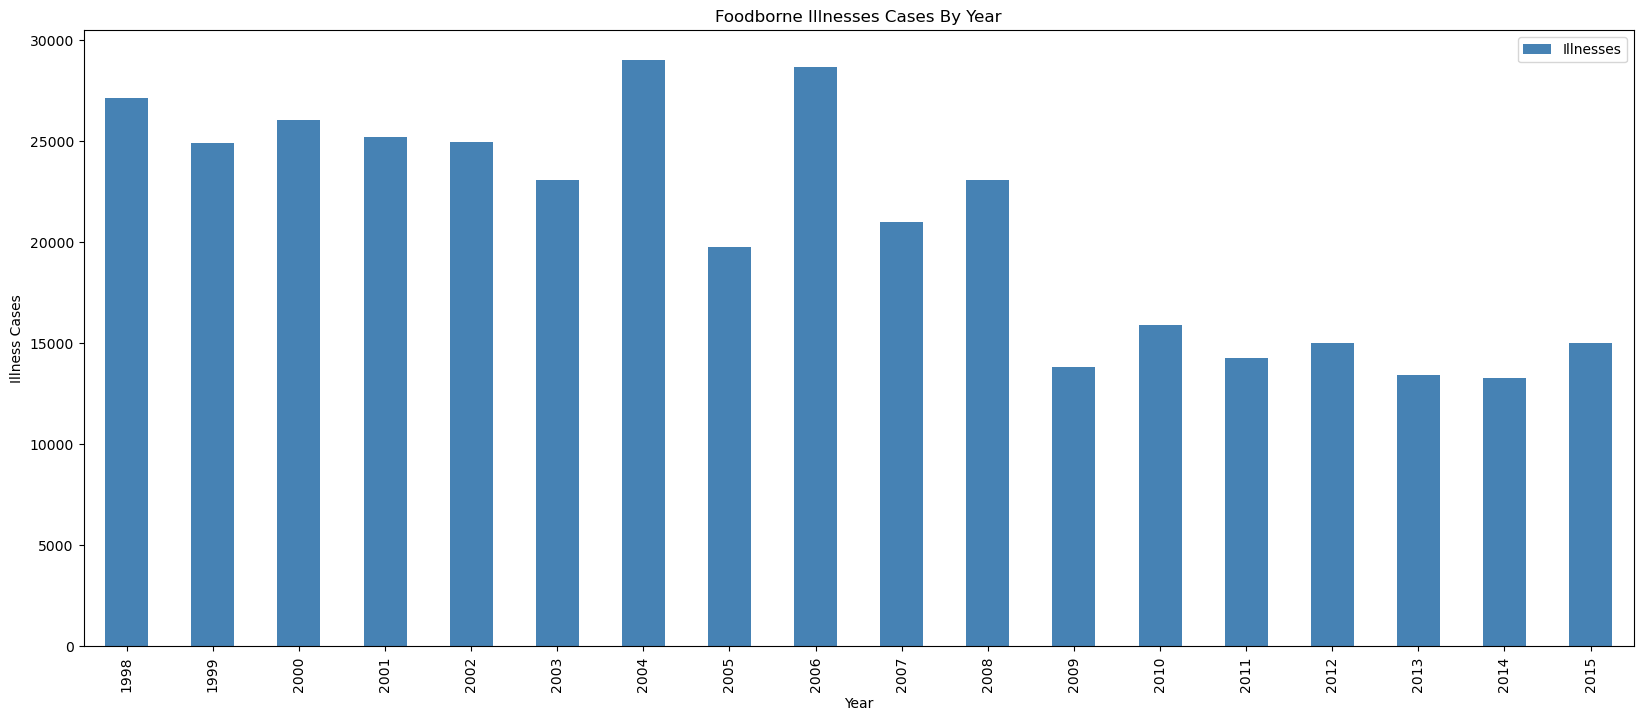

In [95]:
#Plotting the Distribution of FoodBorne Illnesses by Year. We found that there is declining trend with some crests and troughs.
df2 = pd.pivot_table(outbreaks, index='Year', values='Illnesses', aggfunc='sum')
ax = df2.plot(kind='bar', color='steelblue',figsize=(20,8))
plt.title('Foodborne Illnesses Cases By Year')
plt.ylabel('Illness Cases')
plt.show()

## Plotting the Distribution of FoodBorne Illnesses by Months. There is no interesting trend found.

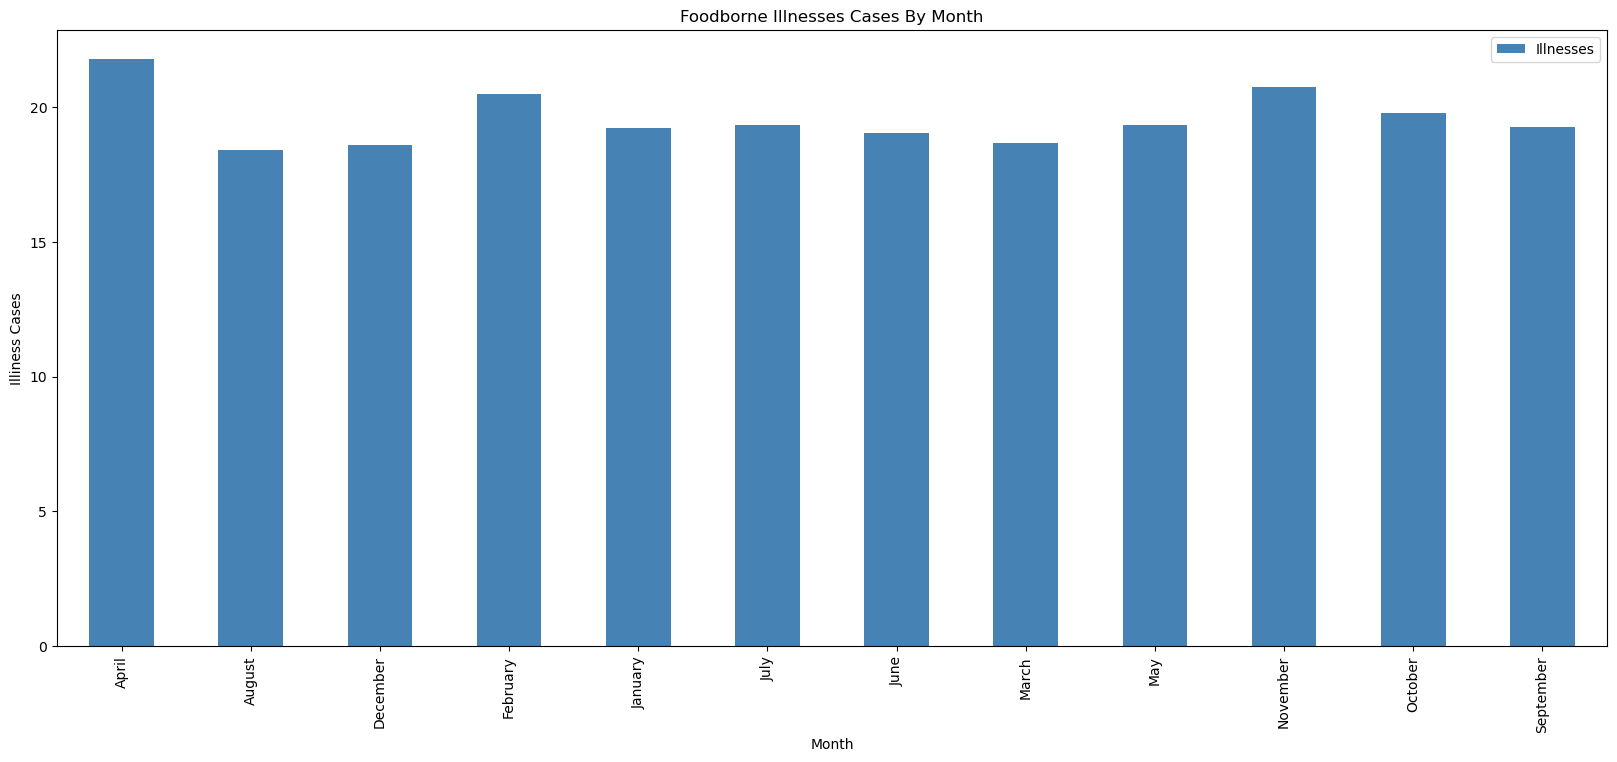

In [96]:
#Distribution of illness by Months
df2 = pd.pivot_table(outbreaks, index='Month', values='Illnesses', aggfunc='mean')
ax = df2.plot(kind='bar', color='steelblue',figsize=(20,8))
plt.title('Foodborne Illnesses Cases By Month')
plt.ylabel('Illiness Cases')
display()
plt.show()

## Looking at the number of top food items

In [97]:
#Looking at the number of top food items
outbreaks.Food.value_counts()
outbreaks.Food.fillna("Unspecified", inplace=True)
outbreaks.Location.fillna("Unknown", inplace=True)
outbreaks.Location.value_counts()
#Filling Hospitalizations Null values with 0
outbreaks.Hospitalizations.fillna(0, inplace=True)

## Creating Normalized Column for Hospitalizations/Illnesses

In [98]:
# Creating Normalized Column for Hospitalizations/Illnesses
outbreaks['normalized_hospitalizations'] = outbreaks.apply(lambda row: round((row.Hospitalizations/row.Illnesses)*100), axis=1)

## Checking distribution Normalized Hospitalizations over the dataset

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


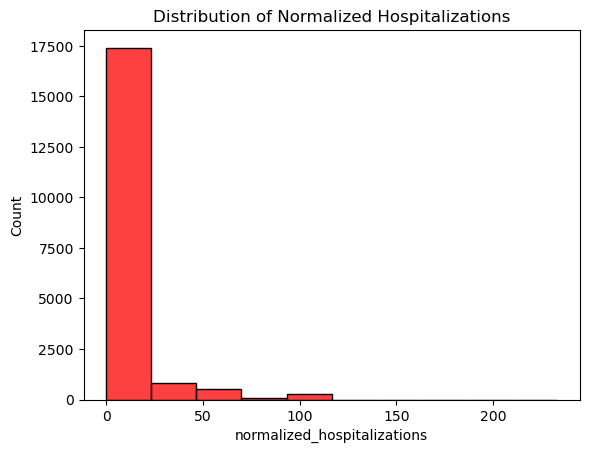

In [99]:
#Checking distrivution Normalized Hospitalizations over the dataset
sns.histplot(outbreaks.normalized_hospitalizations, bins=10, color='red')
plt.title('Distribution of Normalized Hospitalizations')
plt.show()

In [100]:
outbreaks.head(5)

,Year,Month,State,Location,Food,Illnesses,Hospitalizations,normalized_hospitalizations
0,1998,January,California,Restaurant,Unspecified,20,0.0,0
1,1998,January,California,Unknown,Custard,112,0.0,0
2,1998,January,California,Restaurant,Unspecified,35,0.0,0
3,1998,January,California,Restaurant,"Fish, Ahi",4,0.0,0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",26,3.0,12


## Plotting the distribution of illnesses in the dataset to visualize its left skewness

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


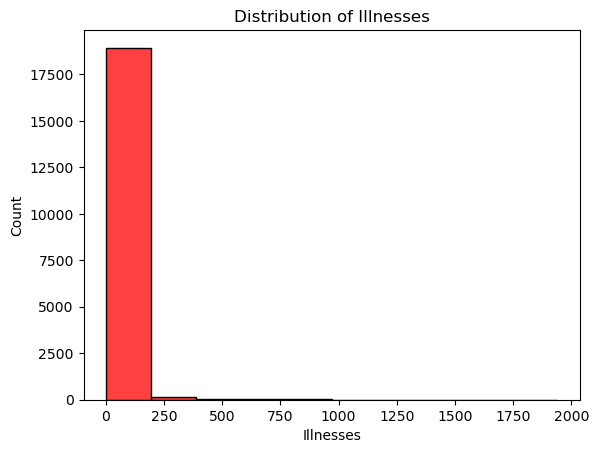

In [101]:
#Plotting the distribution of illnesses in the dataset to visualize its left skewness
sns.histplot(outbreaks.Illnesses, bins=10, color='red')
plt.title('Distribution of Illnesses')
display()
plt.show()

## Plotting the distribution of illnesses in the dataset after they have been standardised by log scale


C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


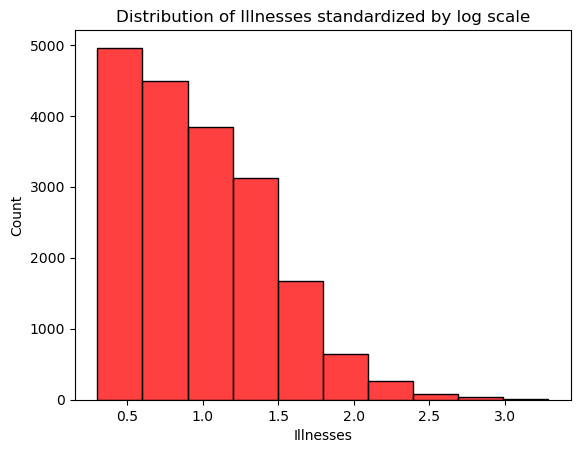

In [102]:
#Plotting the distribution of illnesses in the dataset after they have been standardised by log scale
sns.histplot(np.log10(outbreaks.Illnesses), bins=10, color='red')
plt.title('Distribution of Illnesses standardized by log scale')
display()
plt.show()

## Adding new column log- illness in our data

In [103]:
outbreaks['Illnesses_log'] = np.log(outbreaks.Illnesses)

In [104]:
outbreaks.head()

,Year,Month,State,Location,Food,Illnesses,Hospitalizations,normalized_hospitalizations,Illnesses_log
0,1998,January,California,Restaurant,Unspecified,20,0.0,0,2.995732
1,1998,January,California,Unknown,Custard,112,0.0,0,4.718499
2,1998,January,California,Restaurant,Unspecified,35,0.0,0,3.555348
3,1998,January,California,Restaurant,"Fish, Ahi",4,0.0,0,1.386294
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",26,3.0,12,3.258097


## Loading dataframe manipulation, running regression and classification models

In [106]:
df = pd.DataFrame(outbreaks)

In [107]:
df.dtypes

Year                             int64
Month                           object
State                           object
Location                        object
Food                            object
Illnesses                        int64
Hospitalizations               float64
normalized_hospitalizations      int64
Illnesses_log                  float64
dtype: object

## Deciding the split ratio of the data and transforming them into training, testing and validation

In [108]:
# Randomly shuffle the indices
shuffled_indices = np.random.permutation(df.index)

# Calculate the sizes of training, validation, and testing sets
total_samples = len(df)
train_size = int(0.6 * total_samples)
val_size = int(0.3 * total_samples)
test_size = total_samples - train_size - val_size

# Split the shuffled indices into training, validation, and testing sets
train_indices = shuffled_indices[:train_size]
val_indices = shuffled_indices[train_size:train_size+val_size]
test_indices = shuffled_indices[train_size+val_size:]

# Create training, validation, and testing DataFrames
training_df = df.loc[train_indices]
validation_df = df.loc[val_indices]
testing_df = df.loc[test_indices]

# Display the training DataFrame
display(training_df)

,Year,Month,State,Location,Food,Illnesses,Hospitalizations,normalized_hospitalizations,Illnesses_log
14557,2010,July,Kentucky,Unknown,Unspecified,16,0.0,0,2.772589
12559,2008,March,Kansas,Restaurant,Unspecified,11,0.0,0,2.397895
18832,2015,August,Tennessee,Restaurant,Unspecified,10,0.0,0,2.302585
14487,2010,June,Minnesota,Unknown,Unspecified,4,0.0,0,1.386294
8378,2004,June,Florida,Restaurant,Unspecified,39,3.0,8,3.663562
...,...,...,...,...,...,...,...,...,...
6677,2003,January,Maine,Restaurant,Unspecified,60,0.0,0,4.094345
18898,2015,October,Arizona,Unknown,Unspecified,3,3.0,100,1.098612
15659,2011,December,New York,Catering Service,Unspecified,15,0.0,0,2.708050
2125,1999,August,Kansas,Unknown,Unspecified,36,0.0,0,3.583519


In [109]:
validation_df.columns

Index(['Year', 'Month', 'State', 'Location', 'Food', 'Illnesses',
       'Hospitalizations', 'normalized_hospitalizations', 'Illnesses_log'],
      dtype='object')

In [110]:
df['Year']  # Access the 'Year' column
df['Month']  # Access the 'Month' column
df['State']  # Access the 'State' column
# and so on...


0        California
1        California
2        California
3        California
4        California
            ...    
19114     Wisconsin
19115     Wisconsin
19116     Wisconsin
19117     Wisconsin
19118       Wyoming
Name: State, Length: 19119, dtype: object

## Encode categorical variables using LabelEncoder or OneHotEncoder

In [114]:
# Load your dataset
# Assuming you have a DataFrame named 'df' with columns 'Year', 'State', and 'Month'

# Encode categorical variables using LabelEncoder or OneHotEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])
df['Month'] = label_encoder.fit_transform(df['Month'])

# Split data into features and target
X = df[['Year', 'State', 'Month']]
y = df['Illnesses_log']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['State', 'Month'])
    ],
    remainder='passthrough'
)

# Define the linear regression model
linear_regression = LinearRegression()

# Create a pipeline with preprocessing and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', linear_regression)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the testing data
predictions = pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, predictions, squared=False)
print("Root Mean Squared Error (RMSE) on testing data:", rmse)

Root Mean Squared Error (RMSE) on testing data: 1.0528712259228217


In [115]:
# Assuming you have a DataFrame named 'df' with columns 'State' and 'Month'

# Split data into features and target
X = df[['State', 'Month']]
y = df['Illnesses_log']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first')),  # One-hot encode categorical variables
    ('regressor', LinearRegression())          # Linear Regression model
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Evaluate the model on the testing data
rmse = mean_squared_error(y_test, pipeline.predict(X_test), squared=False)
print("RMSE:", rmse)

RMSE: 1.055081356888051


## Linear Regression Model  with features as Year, State and Month. Using StringIndexer and VectorAssembler to perform One Hot Encoding

In [116]:
# Create a new DataFrame with 'State' and 'Month' columns
new_df = df[['State', 'Month']].copy()

# Initialize LabelEncoder for 'State' and 'Month'
state_encoder = LabelEncoder()
month_encoder = LabelEncoder()

# Encode 'State' and 'Month' columns
new_df['State_indexed'] = state_encoder.fit_transform(new_df['State'])
new_df['Month_indexed'] = month_encoder.fit_transform(new_df['Month'])

# Display the new DataFrame
print(new_df.head(5))


   State  Month  State_indexed  Month_indexed
0      4      4              4              4
1      4      4              4              4
2      4      4              4              4
3      4      4              4              4
4      4      4              4              4


In [117]:
outbreaks_new= outbreaks.copy()
outbreaks_new.head(5)

,Year,Month,State,Location,Food,Illnesses,Hospitalizations,normalized_hospitalizations,Illnesses_log
0,1998,January,California,Restaurant,Unspecified,20,0.0,0,2.995732
1,1998,January,California,Unknown,Custard,112,0.0,0,4.718499
2,1998,January,California,Restaurant,Unspecified,35,0.0,0,3.555348
3,1998,January,California,Restaurant,"Fish, Ahi",4,0.0,0,1.386294
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",26,3.0,12,3.258097


In [118]:
#Dropping the column "Hospitalizations"
outbreaks_new.drop(['Hospitalizations'], axis=1, inplace=True)
outbreaks_new.head(1)

,Year,Month,State,Location,Food,Illnesses,normalized_hospitalizations,Illnesses_log
0,1998,January,California,Restaurant,Unspecified,20,0,2.995732


In [119]:
outbreaks_new.Location.value_counts()

Location
Restaurant                                                               10448
Unknown                                                                   2521
Private Home/Residence                                                    1681
Catering Service                                                          1089
Banquet Facility                                                           367
                                                                         ...  
Private Home/Residence; Grocery Store; Child Daycare                         1
Restaurant; Private Home/Residence; Catering Service; Fair/Festival          1
Restaurant; Private Home/Residence; Grocery Store; Religious Facility        1
Child Daycare; Religious Facility                                            1
Hotel/Motel                                                                  1
Name: count, Length: 161, dtype: int64

In [120]:
outbreaks_new.Food.value_counts()

Food
Unspecified                                           8963
Multiple Foods                                         206
Oysters, Raw                                           165
Ground Beef, Hamburger                                 127
Salad, Unspecified                                     118
                                                      ... 
Goat, Other                                              1
Chicken, Nuggets/Fingers; Coleslaw; Potato, Mashed       1
Sandwich, Club; Potato Salad                             1
Milk, 2% Milk Pasteurized                                1
Cookies, Chocolate Chip                                  1
Name: count, Length: 3128, dtype: int64

## Creating dummy variable for the column "Location" to pick the first location out of the list of location and similarly for food also.


In [121]:
#Creating dummies for Location Variable
outbreaks_new['Location_modified']=outbreaks_new['Location'].str.split(';').str[0]
outbreaks_new['Food_modified']=outbreaks_new['Food'].str.split(',').str[0]
outbreaks_new['Food_modified_new']=outbreaks_new['Food_modified'].str.split(';').str[0]

In [122]:
outbreaks_new.Food_modified_new.value_counts()

Food_modified_new
Unspecified                   8963
Chicken                        713
Sandwich                       551
Fish                           531
Ground Beef                    382
                              ... 
Black Bean And Beef Nachos       1
Raw Cookie Dough                 1
Chicken Fu Yung                  1
Chicken And Broccoli             1
Foie Gras                        1
Name: count, Length: 949, dtype: int64

In [123]:
list(outbreaks_new.columns)

['Year',
 'Month',
 'State',
 'Location',
 'Food',
 'Illnesses',
 'normalized_hospitalizations',
 'Illnesses_log',
 'Location_modified',
 'Food_modified',
 'Food_modified_new']

In [124]:
# Assuming outbreaks_new is a Pandas DataFrame
df = pd.DataFrame(outbreaks_new)

# Display the first 50 rows of the DataFrame
print(df.head(50))

    Year    Month       State                Location  \
0   1998  January  California              Restaurant   
1   1998  January  California                 Unknown   
2   1998  January  California              Restaurant   
3   1998  January  California              Restaurant   
4   1998  January  California  Private Home/Residence   
5   1998  January  California              Restaurant   
6   1998  January  California              Restaurant   
7   1998  January  California              Restaurant   
8   1998  January    Colorado              Restaurant   
9   1998  January    Colorado              Restaurant   
10  1998  January    Colorado           Grocery Store   
11  1998  January    Colorado              Restaurant   
12  1998  January    Colorado  Private Home/Residence   
13  1998  January     Florida              Restaurant   
14  1998  January     Florida              Restaurant   
15  1998  January     Florida              Restaurant   
16  1998  January     Florida  

## Performing StringIndexing and One Hot Encoding on the newly modified columns

In [46]:
obj = (outbreaks_new.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Month', 'State', 'Location', 'Food', 'Location_modified', 'Food_modified', 'Food_modified_new']


In [125]:
# Define the list of categorical columns
categorical_columns = ['Month', 'State', 'Location', 'Food', 'Location_modified', 'Food_modified', 'Food_modified_new']

# Create a OneHotEncoder
onehot_encoder = OneHotEncoder()

# Encode the categorical columns directly
encoded_data = onehot_encoder.fit_transform(outbreaks_new[categorical_columns])

# Convert the encoded data back to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Concatenate the encoded DataFrame with the numerical columns from outbreaks_new
encoded_df = pd.concat([encoded_df, outbreaks_new.drop(categorical_columns, axis=1)], axis=1)

# Display the encoded DataFrame
print(encoded_df.head())


   Month_April  Month_August  Month_December  Month_February  Month_January  \
0          0.0           0.0             0.0             0.0            1.0   
1          0.0           0.0             0.0             0.0            1.0   
2          0.0           0.0             0.0             0.0            1.0   
3          0.0           0.0             0.0             0.0            1.0   
4          0.0           0.0             0.0             0.0            1.0   

   Month_July  Month_June  Month_March  Month_May  Month_November  ...  \
0         0.0         0.0          0.0        0.0             0.0  ...   
1         0.0         0.0          0.0        0.0             0.0  ...   
2         0.0         0.0          0.0        0.0             0.0  ...   
3         0.0         0.0          0.0        0.0             0.0  ...   
4         0.0         0.0          0.0        0.0             0.0  ...   

   Food_modified_new_Yellowtail Tuna  Food_modified_new_Yoba Salad  \
0         

## Model Development and Training:

In [126]:
# Define the list of categorical columns
categorical_columns = ['Month', 'State', 'Location', 'Food', 'Location_modified', 'Food_modified', 'Food_modified_new']

# Encode categorical columns and combine with numerical columns
encoded_data = pd.get_dummies(outbreaks_new[categorical_columns], drop_first=True)
X = pd.concat([encoded_data, outbreaks_new.drop(categorical_columns + ['Illnesses'], axis=1)], axis=1)
y = outbreaks_new['Illnesses']

# Ensure the number of samples is consistent between X and y
assert X.shape[0] == y.shape[0], "Inconsistent number of samples between X and y"

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model on the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [65]:
# Print the shape of X and y to ensure consistency
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split data into training and testing sets
print("\nSplitting data into training and testing sets...")
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

# Train the model on the training data
print("\nTraining the Linear Regression model...")
regressor.fit(X_train, y_train)
print("Model trained successfully!")

# Print model coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, regressor.coef_):
    print(feature, ":", coef)
print("Intercept:", regressor.intercept_)

Shape of X: (19119, 5830)
Shape of y: (19119,)

Splitting data into training and testing sets...
Training set size: 13383
Testing set size: 5736

Training the Linear Regression model...
Model trained successfully!

Model Coefficients:
Month_August : -1.097431037196518
Month_December : -3.816919263962935
Month_February : -0.920007833816378
Month_January : 0.18974662089663907
Month_July : -1.5742822260397595
Month_June : -1.6481635627503999
Month_March : 0.09692475481579521
Month_May : -0.11234398389683697
Month_November : -1.2048038331929858
Month_October : -3.72843006305106
Month_September : -2.1795728832688805
State_Alaska : -25.64437085729347
State_Arizona : -13.882998015967758
State_Arkansas : -18.127764882891462
State_California : -16.758161134748043
State_Colorado : -19.740636445928438
State_Connecticut : -20.25004110731737
State_Delaware : -28.06256387433479
State_Florida : -8.157903922732912
State_Georgia : -15.693087959813603
State_Guam : -5.921259849336503
State_Hawaii : -13.7

## Evaluate Model Performance

In [127]:
# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 3.85119634226605e+21
Mean Absolute Error (MAE): 9099799597.716091
Root Mean Squared Error (RMSE): 62058007881.86848


## Tune Hyperparameters (example using Ridge Regression)

In [128]:
# Define hyperparameters to tune
param_grid = {'alpha': [0.1, 1, 10, 100]}

# Create Ridge Regression model
ridge_model = Ridge()

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train model with best hyperparameters
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

print("Grid Search Results:")
print("Best hyperparameters:", grid_search.best_params_)
print("Best negative mean squared error:", -grid_search.best_score_)

print("\nBest Ridge Regression Model:")
print("Best alpha:", best_alpha)
print("R2 score on training data:", best_ridge_model.score(X_train, y_train))
print("R2 score on testing data:", best_ridge_model.score(X_test, y_test))

Grid Search Results:
Best hyperparameters: {'alpha': 100}
Best negative mean squared error: 1676.8323216271663

Best Ridge Regression Model:
Best alpha: 100
R2 score on training data: 0.41424910291280015
R2 score on testing data: 0.4167117239445641


## Feature Engineering (example: adding polynomial features):

In [129]:
# Create PolynomialFeatures object with a lower degree
poly = PolynomialFeatures(degree=1)

# Transform features to add polynomial features
X_poly = poly.fit_transform(X)

# Split transformed data into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.3, random_state=42)

# Train Linear Regression model with polynomial features
regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train_poly)

LinearRegression()

## Model Selection (example using Decision Tree Regression)

In [130]:
# Create Decision Tree Regression model
tree_regressor = DecisionTreeRegressor()

# Train the Decision Tree model
tree_regressor.fit(X_train, y_train)

# Evaluate the trained model
train_score = tree_regressor.score(X_train, y_train)
test_score = tree_regressor.score(X_test, y_test)

print("Training Score (R^2):", train_score)
print("Testing Score (R^2):", test_score)

Training Score (R^2): 1.0
Testing Score (R^2): 0.9940134315246953


## Cross-Validation:

In [131]:
# Perform cross-validation with 5 folds
scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive values
mse_scores = -scores

# Calculate RMSE scores
rmse_scores = np.sqrt(mse_scores)

# Print RMSE scores
print("Cross-Validation RMSE scores:", rmse_scores)


Cross-Validation RMSE scores: [1.72059164e+10 6.99108153e+10 9.03792896e+10 2.59273036e+10
 2.54209026e+10]


## Saving the Model

In [132]:
import joblib

# Save the trained model to a file
joblib.dump(regressor, 'linear_regression_model.pkl')


['linear_regression_model.pkl']

## Loading the Saved Model and Making Predictions

In [133]:
# Load the saved model
loaded_model = joblib.load('linear_regression_model.pkl')

# Make predictions on new data
# Assuming X_new contains the features of the new data
#y_pred_new = loaded_model.predict(X_new)
print("loaded model")

loaded model


In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions using the Linear Regression model
y_pred_linear = regressor.predict(X_test)

# Calculate evaluation metrics for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

## Final accuracy and results

In [144]:
print("Linear Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_linear)
print("Mean Squared Error (MSE):", mse_linear)
print("Root Mean Squared Error (RMSE):", rmse_linear)

Linear Regression Metrics:
Mean Absolute Error (MAE): 9099799597.716091
Mean Squared Error (MSE): 3.85119634226605e+21
Root Mean Squared Error (RMSE): 62058007881.86848


In [145]:
print("Best Ridge Regression Model:")
print("Best alpha:", best_alpha)
print("R2 score on training data:", best_ridge_model.score(X_train, y_train))
print("R2 score on testing data:", best_ridge_model.score(X_test, y_test))

Best Ridge Regression Model:
Best alpha: 100
R2 score on training data: 0.41424910291280015
R2 score on testing data: 0.4167117239445641


In [147]:
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
print("Decision Tree Regression Metrics:")
print("Mean Absolute Error (MAE):", mae_tree)
print("Mean Squared Error (MSE):", mse_tree)
print("Root Mean Squared Error (RMSE):", rmse_tree)

Decision Tree Regression Metrics:
Mean Absolute Error (MAE): 0.0943165969316597
Mean Squared Error (MSE): 10.970536959553696
Root Mean Squared Error (RMSE): 3.3121800916546937
